Side Ellipses. 
This is creating the 6 other ellipsoids (see page 78 and 114 - 116). Three on each side. The only difference is how they are rotated about what axes, and where their corresponding foci are. 

The markdown is from before I realized when to do rotation (see pg 117)

Mira

In [5]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFun import *
from random import uniform

#create ellipse: 
coeffellipse5 = [264.02,256,64.58]
x,y1,y2,z = createellipse(coeffellipse5)
pl3d = pl.figure().gca(projection = '3d')
pl3d.plot(x,y1,z)
pl.show()

#rotates a given ellipse around ALL AXES
def rotatestrand3d(thetxyz, coeffellipse):
    Rotated = []
    xc,yc1,yc2,zc = createellipse(coeffellipse)
    for i in range (0,100): 
        v = [xc[i], yc1[i],zc[i]] # number of original points
        v2 = np.array(np.dot(v,Rxyz(thetxyz)))
        Rotated.append(v2[0]) #rotated vectors
    xcR1 = []
    ycR1 = []
    zcR1 = []
    for j in range (0,100):
        xcR1.append(Rotated[j][0])
        ycR1.append(Rotated[j][1])
        zcR1.append(Rotated[j][2])
    return xcR1,ycR1,zcR1

#makes the ellipse 3d by rotating around ALL AXES???
def createz3d(a,n, coeffellipse):
    x1 = []
    y1 = []
    z1 = []
    for i in range (0,a):
        thet = np.linspace(0,n,a)
        x,y,z = rotatestrand3d([thet[i], thet[i], thet[i]], coeffellipse)
        x1.extend(x)
        y1.extend(y)
        z1.extend(z)
    return x1,y1,z1

thet = [np.pi/2, np.pi/2, np.pi/2]
coeffellipse = [256,247.7,64.5]
X,Y,Z = rotatestrand3d(thet,coeffellipse)
pl3d = pl.figure().gca(projection = '3d')
pl3d.plot(X,Y,Z)
pl.show()
#YAY it's rotating. now make the entire ellipse that is rotated! (correct full ellipsoid)

#more complex so discarded
def rotatestrandboundshiftCORRECTING3dcomplex(thetaxyz, coeffellipse,length,origin, sign):
    Rotated = []
    xc,yc1,yc2,zc = createellipseboundshift(coeffellipse,length,origin)
    if sign == 'pos':
        for i in range (0,100): 
            v = [xc[i], yc1[i],zc[i]] # number of original points
            v2x = np.array(np.dot(v,Rx(thetaxyz[0]))) #multiplied by rotation vector
            v2xy = np.array(np.dot(v2x,Ry(thetaxyz[1]))) #y
            v2xyz = np.array(np.dot(v2xy,Rz(thetaxyz[2]))) #z
            Rotated.append(v2xyz[0]) #rotated vectors #rotated vectors
    if sign == 'neg':
        for i in range (0,100):
            v = [xc[i], yc2[i], zc[i]] #number of original points on NEGATIVE side of ellipse
            v2x = np.array(np.dot(v,Rx(thetaxyz[0]))) #multiplied by rotation vector
            v2xy = np.array(np.dot(v2x,Ry(thetaxyz[1]))) #y
            v2xyz = np.array(np.dot(v2xy,Rz(thetaxyz[2]))) #z
            Rotated.append(v2xyz[0]) #rotated vectors
    xcR1 = []
    ycR1 = []
    zcR1 = []
    for j in range (0,100):
        xcR1.append(Rotated[j][0])
        ycR1.append(Rotated[j][1])
        zcR1.append(Rotated[j][2])
    return xcR1,ycR1,zcR1

In [6]:
#testing matrix multiplication
def Rx(x):
    Rx = np.matrix([[1,0,0],[0, np.cos(x), -np.sin(x)], [0, np.sin(x), np.cos(x)]])
    return Rx

def Ry(y):
    Ry = np.matrix([[np.cos(y),0,np.sin(y)],[0, 1, 0], [-np.sin(y), 0, np.cos(y)]])
    return Ry

def Rz(z):
    Rz = np.matrix([[np.cos(z), - np.sin(z), 0],[np.sin(z), np.cos(z), 0], [0, 0, 1]])
    return Rz
def Rxyz (thet):
    Rxyz = Rx(thet[0])*Ry(thet[1])*Rz(thet[2])
    return Rxyz

#given a set of x,y,z, rotate all (???) trying to rotate after all has been made as opposed to during
def rotate3d(x,y,z, thetxyz):
    Rotated = []
    for i in range (0, len(x)):
        v = [x[i], y[i], z[i]]
        v2 = np.array(np.dot(v,Rxyz(thetxyz)))
        Rotated.append(v2[0]) #rotated vectors
    xR1 = []
    yR1 = []
    zR1 = []
    for j in range (0,len(x)):
        xR1.append(Rotated[j][0])
        yR1.append(Rotated[j][1])
        zR1.append(Rotated[j][2])
    return xR1,yR1,zR1

def rotate3dsing(x,y,z, thetxyz):
    v = x,y,z
    v2 = np.array(np.dot(v,Rxyz(thetxyz)))
    xR, yR, zR = v2[0]
    return xR, yR, zR

def rotatestrandboundshiftCORRECTING3d(thet, coeffellipse,length,origin, sign):
    Rotated = []
    xc,yc1,yc2,zc = createellipseboundshift(coeffellipse,length,origin)
    if sign == 'pos':
        for i in range (0,100): 
            v = [xc[i], yc1[i],zc[i]] # number of original points
            v2 = np.array(np.dot(v,Rxyz(thet)))
            Rotated.append(v2[0]) #rotated vectors #rotated vectors
    if sign == 'neg':
        for i in range (0,100):
            v = [xc[i], yc2[i], zc[i]] #number of original points on NEGATIVE side of ellipse
            v2 = np.array(np.dot(v,Rxyz(thet)))
            Rotated.append(v2[0]) #rotated vectors
    xcR1 = []
    ycR1 = []
    zcR1 = []
    for j in range (0,100):
        xcR1.append(Rotated[j][0])
        ycR1.append(Rotated[j][1])
        zcR1.append(Rotated[j][2])
    return xcR1,ycR1,zcR1

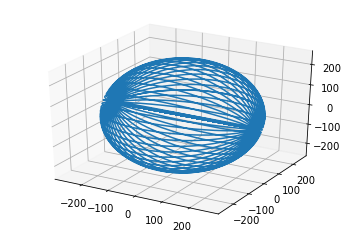

In [7]:
coeffellipse56 = [263.91,255.886,64.58]
x,y,z = createz(50, np.pi*2, coeffellipse56)
pl3d = pl.figure().gca(projection = '3d')
pl3d.plot(x,y,z)
pl.show()
#so this is the ellipsoid before it is rotated at all

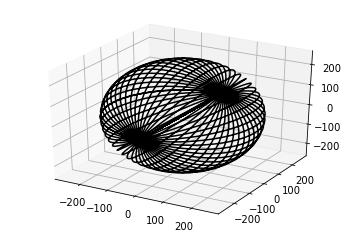

In [8]:
thet = [0, 0, 3*np.pi/2]
xR, yR, zR = rotate3d(x,y,z,thet )
pl3d = pl.figure().gca(projection = '3d')
pl3d.plot(xR,yR,zR, color = 'black') #rotated
#pl3d.plot(x,y,z, color = 'blue') #original
pl.show()
#legitimately cannot tell if this is correct LOL, I think it is???
#so from this, then make the three end ellipses!

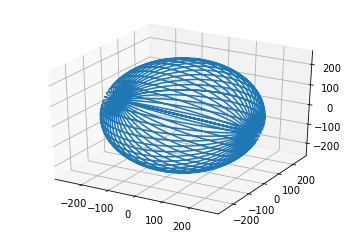

In [9]:
#this is ellipse 5 and 6. (see pg 115 and 119 for calculations)
thet = [0,0, .1163]
x56, y56, z56 = createz (50, np.pi*2, coeffellipse56)
x56R, y56R, z56R = rotate3d(x56, y56, z56, thet)
pl3d = pl.figure().gca(projection = '3d')
pl3d.plot(x56R, y56R, z56R)
pl.show()

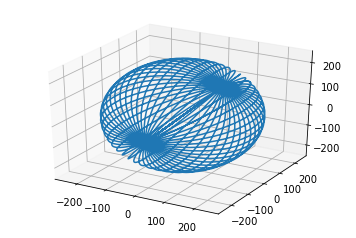

In [42]:
#now make ellipse 7??
coeffellipse7 = [246.51, 241, 51.175]
thet = [0,.8819,.2297]
x7, y7, z7 = createz (50, np.pi*2, coeffellipse7)
x7R, y7R, z7R = rotate3d(x7, y7, z7, thet)
pl3d = pl.figure().gca(projection = '3d')
pl3d.plot(x7R, y7R, z7R)
pl.show()

In [12]:
#using bound shift and correcting to make the FINAL actual FTSellipses
#maybe rotate at the beginning of FTSellipse? make selection of PART of ellipse more clear
def FTSCEllipsoidCORRECTING3d (a,n, coeffellipse, length, origin, sign, thet):
    X,Y,Z = createzboundshiftCORRECTING(a,n, coeffellipse, length, origin, sign)
    X,Y,Z = rotate3d(X,Y,Z, thet)
    X1,Y1,Z1 = createzboundshiftCORRECTING(a,-n, coeffellipse, length, origin, sign)
    X1,Y1,Z1 = rotate3d(X1,Y1,Z1, thet)
    if sign != 'pos' and sign != 'neg':
        print ('Error')
    return X,Y,Z, X1, Y1, Z1
def setrange3drot(xrange, X,Y,Z, origin3d, sign, thet):
    origin = rotate3dsing(origin3d[0], origin3d[1], origin3d[2], thet)
    x = []
    y = []
    z = []
    for i in range (0, len(X)):
        xinti = X[i]
        yinti = Y[i]
        zinti = Z[i]
        if sign == 'pos':
            if (xinti-origin[0])**2 + (zinti-origin[2])**2 < xrange**2 and yinti > 0:
                x.append(xinti)
                y.append(yinti)
                z.append(zinti)
        if sign == 'neg':
            if (xinti-origin[0])**2 + (zinti-origin[2])**2 < xrange**2 and yinti < 0:
                x.append(xinti)
                y.append(yinti)
                z.append(zinti)
    return x,y,z

In [13]:
#this is ellipse 5 and 6. (see pg 115 for calculations)
thet5 = [0,0, -.1163]
thet6 = [0,0, .1163] #OPPOSITE DIRECTIONS OF ROTATION!!!
#x56, y56, z56 = createz (50, np.pi*2, coeffellipse56)
#x56R, y56R, z56R = rotate3d(x56, y56, z56, thet)
#pl3d = pl.figure().gca(projection = '3d')
#pl3d.plot(x56R, y56R, z56R)
#pl.show()
origin56 = [0,0,0]
X156,Y156,Z156,X256,Y256,Z256 = FTSCEllipsoidCORRECTING3d(50, np.pi/8, coeffellipse56,64.15, origin56,'pos' , thet5)
Xset56, Yset56, Zset56 = setrange3drot(32.07, X156,Y156,Z156,origin56 , 'pos', thet5)
Xset256, Yset256, Zset256 = setrange3drot(32.07, X256, Y256, Z256,origin56 , 'pos', thet5)

X356,Y356,Z356,X456,Y456,Z456 = FTSCEllipsoidCORRECTING3d(50, np.pi/8, coeffellipse56,64.15, origin56,'neg' , thet6)
Xset356, Yset356, Zset356 = setrange3drot(32.07, X356,Y356,Z356,origin56 , 'neg', thet6)
Xset456, Yset456, Zset456 = setrange3drot(32.07, X456, Y456, Z456,origin56 , 'neg', thet6)

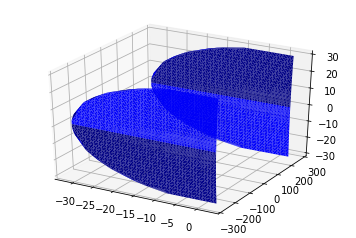

In [14]:
pl3d = pl.figure().gca(projection = '3d')
#pl3d.plot(X1, X1, Z1)
pl3d.plot_trisurf(Xset56,Yset56,Zset56, color = 'blue') #ELLIPSE 5
pl3d.plot_trisurf(Xset256,Yset256,Zset256, color = 'blue') #ELLIPSE 5
pl3d.plot_trisurf(Xset356,Yset356,Zset356, color = 'blue') #ELLIPSE 6
pl3d.plot_trisurf(Xset456,Yset456,Zset456, color = 'blue') #ELLIPSE 6
pl3d.set_ylim(-300,300)
pl.show()

#i think this is ellipses 5 and 6?

In [15]:
#ellipse 7 (challenge. see pg 115 and 116 for calculation)
coeffellipse7 = [246.51, 241, 51.8175]
thet7 = [0,.8819, -.2297] #x znd z are 'negated' but y is correct when it comes to angle of rotation

origin7 = [0,0,0]
origin71 = [64.15,0,0] #where is the origin? see page 116
X17,Y17,Z17,X27,Y27,Z27 = FTSCEllipsoidCORRECTING3d(50, np.pi/8, coeffellipse7,64.15, origin7,'pos' , thet7)
#Xset7, Yset7, Zset7 = setrange3drot(32.07, X17,Y17,Z17,origin71 , 'pos', thet7)
#Xset27, Yset27, Zset27 = setrange3drot(32.07, X27, Y27, Z27,origin71 , 'pos', thet7)

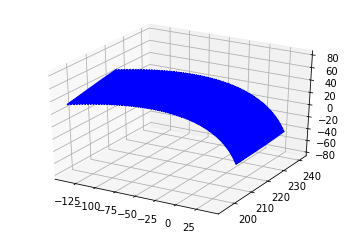

In [16]:
pl3d = pl.figure().gca(projection = '3d')
pl3d.plot(X17, Y17, Z17, color = 'blue')
pl3d.plot(X27, Y27, Z27, color = 'blue')
#pl3d.plot_trisurf(Xset7,Yset7,Zset7, color = 'blue') #ELLIPSE 7
#pl3d.plot_trisurf(Xset27,Yset27,Zset27, color = 'blue') #ELLIPSE 7
pl.show()
#clearly a problem with shaping!! (ask meyer?)

pl3d = pl.figure().gca(projection = '3d')
#pl3d.plot(X1, X1, Z1) #this is with a NEGATIVE rotation??? did I mess a sign up somewhere?
#pl.show()

p = [0,0,0]
v = [1,0,0]
xL,yL,zL = make_line(p, v, 30)

#now rotate around Z AXIS BY PI/2?
thet = [0,0, np.pi/4]
xLr, yLr, zLr = rotate3d(xL,yL,zL, thet)

#now rotate around Z AXIS BY -PI/2?

thet1 = [0,0, -np.pi/4]
xLr1, yLr1, zLr1 = rotate3d(xL,yL,zL, thet1)

pl3d.plot(xL,yL,zL, color = 'blue') #original
pl3d.plot(xLr,yLr,zLr, color = 'red')  #positive (supposed to be anticlockwise)
pl3d.plot(xLr1,yLr1,zLr1, color = 'green') #negative (supposed to be clockwise?)

pl.show()

#clearly rotates in the wrong direction so wtf is up with the negative sign??
#zrotation is in incorrect direction
#ignore until later?

pl3d = pl.figure().gca(projection = '3d')
#pl3d.plot(X1, X1, Z1) #this is with a NEGATIVE rotation??? did I mess a sign up somewhere?
#pl.show()

p = [0,0,0]
v = [1,0,0]
xL,yL,zL = make_line(p, v, 30)

#now rotate around Y AXIS BY PI/2?
thet = [0, np.pi/4, 0]
xLr, yLr, zLr = rotate3d(xL,yL,zL, thet)

#now rotate around Z AXIS BY -PI/2?

thet1 = [0, -np.pi/4, 0]
xLr1, yLr1, zLr1 = rotate3d(xL,yL,zL, thet1)

pl3d.plot(xLr,yLr,zLr, color = 'red')  #positive (supposed to be anticlockwise)
pl3d.plot(xL,yL,zL, color = 'blue') #original
pl3d.plot(xLr1,yLr1,zLr1, color = 'green') #negative (supposed to be clockwise?)

pl.show()

#clearly rotates in the wrong direction so wtf is up with the negative sign??
#y rotation is in CORRECT direction
#ignore until later?

pl3d = pl.figure().gca(projection = '3d')
#pl3d.plot(X1, X1, Z1) #this is with a NEGATIVE rotation??? did I mess a sign up somewhere?
#pl.show()

p = [0,0,0]
v = [0,1,0]
xL,yL,zL = make_line(p, v, 30)

#now rotate around Y AXIS BY PI/2?
thet = [np.pi/4, 0, 0]
xLr, yLr, zLr = rotate3d(xL,yL,zL, thet)

#now rotate around Z AXIS BY -PI/2?

thet1 = [ -np.pi/4, 0, 0]
xLr1, yLr1, zLr1 = rotate3d(xL,yL,zL, thet1)

pl3d.plot(xLr,yLr,zLr, color = 'red')  #positive (supposed to be anticlockwise)
pl3d.plot(xL,yL,zL, color = 'blue') #original
pl3d.plot(xLr1,yLr1,zLr1, color = 'green') #negative (supposed to be clockwise?)

pl.show()

#clearly rotates in the wrong direction so wtf is up with the negative sign??
#X rotation is in incorrect direction
#ignore until later? 